<a href="https://colab.research.google.com/github/sbzkdl/AIB-Section2-Project/blob/main/ai_15_s2pj_%EB%B0%95%EA%B1%B4%ED%9B%84(%EB%B6%84%EB%A5%98%2C%20%ED%8A%B9%EC%84%B1%20%EC%A4%91%EC%9A%94%EB%8F%84%EA%B9%8C%EC%A7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # 구글 드라이브와 연동
# import sys

# if "google.colab" in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')

## 1. 데이터 선정 이유 및 문제 정의

### 1. 문제 정의

한국 음악 시장이 글로벌해짐에 따라 의뢰인은 어떤 음악이 세계적으로 성공할 수 있는지 분석을 의뢰하였습니다. 대중적으로 성공적인 음악(인기도가 높은 음악)을 출시하기 위해서는 어떤 특성을 가져야할까요?


1. 가장 인기 있는 장르는 어떤 것일까요?
2. 재생시간은 어느 정도가 적당할까요? 재생시간이 인기도에 영향을 줄까요?
3. 인기도에 가장 영향을 많이 주는 요소는 무엇일까요?
4. genre에 따라 danceability가 예측에 영향을 주는 정도가 다를까요?



### 2. 데이터 설명

※ 데이터셋 특성 설명  
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features


Features
- genre : 음악 장르
- artist_name : 아티스트 이름
- track_name : 트랙 이름
- track_id : 트랙에 대한 데이터 출처 사이트(Spotify)의 ID
- popularity : 트랙이 인기가 있는지에 대한 0 ~ 100까지의 수치이며, 값이 클수록 인기가 많은 트랙이다.
- acousticness : 트랙이 어쿠스틱한지에 대한 0.0 ~ 1.0의 측정 값이며, 값이 클수록 어쿠스틱하다.
- danceability : 템포, 리듬 안정성, 박자의 힘, 전체적인 규칙성을 포함한 음악적 요소들의 조합에 기초하여 트랙이 얼마나 춤에 적합한지를 설명. 값이 클수록 춤을 추기에 적합하다.
- duration_ms : million seconds 단위의 재생시간
- energy : 트랙의 강도와 액티비티함에 대한 0.0 ~ 1.0의 측정 값이며, 값이 클수록 빠르고 시끄럽다.
- instrumentalness - 트랙에 보컬이 없는지에 대한 예측 값이며, 값이 클수록 트랙에 보컬이 없을 가능성이 커진다. 
- key : 트랙의 키; 음의 높낮이.
- liveness : 청중의 존재를 탐지한다. 값이 클수록 라이브 확률이 높아집니다. 특히, 0.8보다 클 때 라이브일 가능성이 더 높습니다.
- loudness : 트랙의 전체 음량(dB). 음량 값은 전체 트랙에서 평균화되어 트랙의 상대적 음량을 비교하는 데 유용하다. 일반적으로 값은 -60에서 0db 사이다.
- mode : 트랙의 형식(Major 또는 Minor)을 나타낸다.
- speechiness : 트랙에서 음성 단어의 존재를 감지한다. 녹음(예: 토크쇼, 오디오북, 시)과 같은 음성 전용일수록 속성 값은 1.0에 가깝다. 0.66 이상의 값은 전적으로 음성 단어로 구성된 트랙일 가능성이 높다. 0.33 미만의 값은 음악 및 기타 비음성 트랙을 나타낼 가능성이 높습니다.
- tempo : 트랙의 전체 추정 속도(분당 비트 수)입니다. 음악 용어에서 템포(tempo)는 주어진 곡의 속도 또는 속도를 말하며 평균 박자 지속 시간에서 직접 파생된다.
- time_signature : 트랙의 박자; 각 막대(또는 측정값)에 얼마나 많은 박자가 있는지 지정하는 표기법.
- valence : 트랙에 의해 전달되는 음악적 긍정성을 설명하는 0.0 ~ 1.0의 측정값. 값이 높은 트랙은 더 긍정적으로 들리고(예: 행복, 쾌활, 행복), 낮은 트랙은 더 부정적으로 들린다(예: 슬픔, 우울, 화).

### 3. 가설



1. 가장 인기 있는 장르는 Pop일 것이다.  
2. 재생시간은 인기도에 영향을 주지 않을 것이다.  
3. 인기도에 가장 영향을 많이 주는 요소는 energy일 것이다.  
4. genre에 따라 danceability가 예측에 영향을 주는 정도가 다를 것이다.



## 2. 데이터 전처리, EDA, 시각화

### 1. 데이터 전처리 및 EDA

In [ ]:
# 드라이브에 있는 데이터 가져오기 및 데이터 형태 확인
target = 'popularity'
# origin_df = pd.read_csv('/content/drive/MyDrive/데이터/s2pj/Spotify Tracks DB/SpotifyFeatures.csv')
origin_df = pd.read_csv('SpotifyFeatures.csv')
df = origin_df.copy()
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
# 결측치 확인
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

> 확인 결과, 결측치 없음

---



#### target 전처리

> 분류 문제를 풀기 위해서 target 값인 'popularity'의 수치를 '0(인기 없음)', '1(인기 있음)'으로 치환한다. 0과 1로 나누는 척도는 1998~2020년도의 Top 100의 popularity 값의 평균 이상의 값들을 '인기 있음'으로 분류한다.

In [ ]:
# top_100s = pd.read_csv('/content/drive/MyDrive/데이터/s2pj/Top Hits Spotify from 1998-2020/songs_normalize.csv')
top_100s = pd.read_csv('songs_normalize.csv')
top_100s.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
# 평균 값을 구하고, 그 값을 기준으로 0과 1로 치환
cutline = top_100s.popularity.mean()

df[target] = df[target]>=cutline

df[target] = df[target].replace([False, True], [0, 1])

In [ ]:
# 잘 바뀌었는지 확인
df[target].unique()

array([0, 1], dtype=int64)

---

#### 문자형 칼럼 EDA

In [ ]:
# 문자형 칼럼 카디널리티 확인
obj = df.dtypes[df.dtypes == 'object'].index
df[obj].nunique().sort_values(ascending=False)

track_id          176774
track_name        148615
artist_name        14564
genre                 27
key                   12
time_signature         5
mode                   2
dtype: int64

> 확인 결과, id와 name이 들어간 칼럼이 카디널리티가 높은 것을 확인. 또한, 모델이 학습할 때 필요없는 private한 데이터이므로 데이터 정보를 더 수집 후 삭제.

In [ ]:
# 문자형 칼럼 데이터 상세 확인
df.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

> * 확인 결과, "Children's Music", 'Children’s Music'를 동일한 문자로 통일해야함을 확인.
* 다른 문자형 칼럼은 문제 없음을 확인.

In [ ]:
# 'Children’s Music'를 "Children's Music"로 교체
df['genre'] = df['genre'].replace("Children’s Music", "Children's Music")

In [ ]:
# 잘 바뀌었나 확인 결과, 바뀌었음을 확인.
df.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

---

#### 수치형 칼럼 EDA

In [ ]:
# 'duration_ms' 칼럼 단위 변경
df['duration_ms'] = round(df['duration_ms'] / 1000 / 60, 2)
df.rename(columns={'duration_ms' : 'duration_m'}, inplace=True)

> 재생시간 단위가 micro seconds임을 확인하고, 편하게 보고자 minutes 단위로 변경.

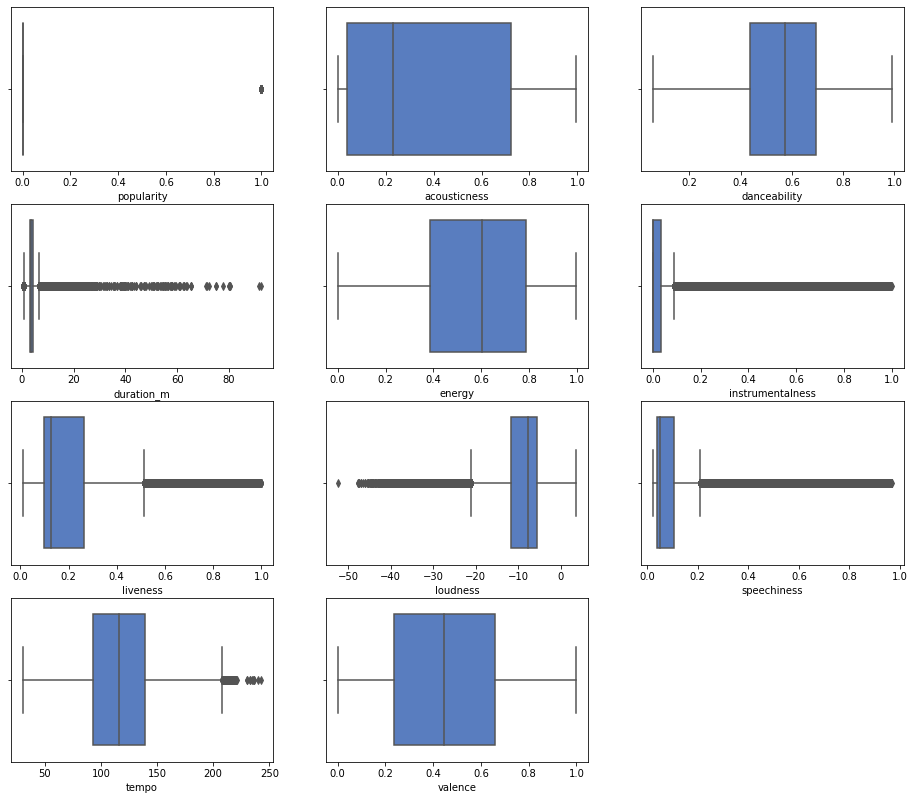

In [ ]:
# 수치형 데이터 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns

num = df.dtypes[df.dtypes != 'object'].index
fig = plt.figure(figsize=(16, 32))
i = 1
for f in num :
    plt.subplot(9,3,i)
    sns.boxplot(data=df, x=f,palette='muted')
    i += 1

> * 확인 결과, 'duration_m'이 이상하다는 것을 확인.  
* 다른 이상치가 있어보이는 칼럼('instrumentalness', 'liveness')은 원래 0~1.0까지 분포.  
* 'tempo' 같은 경우 200이상의 장르도 존재 ex) 하드코어 테크노, 스피드코어 등

In [ ]:
# 'duration_m' 특성 더 자세히 확인
df.duration_m.describe()

count    232725.000000
mean          3.918707
std           1.982264
min           0.260000
25%           3.050000
50%           3.670000
75%           4.430000
max          92.550000
Name: duration_m, dtype: float64

> 확인 결과, 75%이상의 수치에서 이상치가 있음을 확인.

In [ ]:
# 재생시간이 6분이 넘어가는 데이터 추출 후 확인
df.query('duration_m>6').sort_values(by='duration_m', ascending=False)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_m,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
212083,Comedy,La Mesa Reñoña,"Episodio 15 (Lady Orinoco, Políticas De Youtub...",76vVk4HCOLP5r7hA53SyXg,0,0.84600,0.468,92.55,0.5800,0.00000,C,0.1380,-11.615,Major,0.4120,72.690,3/4,0.8010
162671,Reggaeton,DJ Luigi,6 : 00 Am,5p44BE1eYof6B2HSj3LTfQ,0,0.07840,0.513,91.47,0.8510,0.00000,B,0.2210,-3.982,Minor,0.0803,100.503,4/4,0.7020
211969,Comedy,La Mesa Reñoña,"Episodio 14 (Machismo, Juanga, Bebé a Bordo)",3Y800wAK7yLS2vckDD4WCz,0,0.85000,0.392,80.51,0.6220,0.00000,A,0.3520,-10.526,Major,0.3660,58.163,4/4,0.7750
23593,Electronic,Excision,Lost Lands 2017 Mix,40lBktIvVS4tBpGHm8W44C,0,0.00164,0.467,80.51,0.9480,0.01030,C#,0.4050,-1.929,Major,0.2990,148.898,4/4,0.3170
219057,World,Jamie Llewellyn,Nature Sounds for Sleep: Crackling Log Fire wi...,40duG6erWyOVizxE9P8KqV,0,0.15000,0.316,80.07,0.2390,0.93700,B,0.1450,-23.395,Minor,0.0600,126.988,1/4,0.3210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223974,Rock,Boston,Don't Look Back,4QySZtWymRGNgrwxZOODKF,0,0.01500,0.359,6.01,0.7170,0.00365,D,0.3600,-10.309,Major,0.0405,121.878,4/4,0.4700
35157,Anime,Aimer,Fuyu No Diamond,0MqvvUNqrOmHizqPNvc11K,0,0.64200,0.501,6.01,0.5570,0.00000,F#,0.0868,-4.804,Major,0.0258,75.989,4/4,0.4020
207479,World,Trygve Seim,Ciaccona per Embrik,4rznhkoOr1AYneKuWBef4V,1,0.97400,0.302,6.01,0.0166,0.07140,G,0.0737,-23.504,Major,0.0475,69.904,3/4,0.2350
48873,Blues,Graveyard,The Siren,02Jh0orUaFfiVEDt01BolR,0,0.27300,0.408,6.01,0.4710,0.00119,G,0.1370,-6.969,Minor,0.0446,122.537,3/4,0.3020


> * 보통 노래 재생시간이 3~4분이고, 최대 5분임. 그리고 그 중 필자가 아는 노래 중에 가장 긴 노래(Queen - Bohemian Rhapsody)가 6분이므로 기준점을 6분으로 잡았다.
* 40분, 80분, 90분 등등 노래 서칭 결과, 실제로 재생시간이 그러함을 확인.

---

#### 중간 점검

> 아래 사항은 train set과 test set을 나눈 후에 train set에만 적용한다.

1. 필자가 원하는 음악은 6분 이하의 음원이므로 넉넉히 7분 이상의 음원은 삭제한다.
2.  또한, 'Movie', 'Comedy'와 같은 장르는 음악이 아닌 음원이 추출된 형식이 존재한다. 그 중에서도 'speechiness가 0.66 이상인 값은 전적으로 음성으로 만들어진 트랙을 나타내므로(데이터 특성 설명 페이지 참고) 필자가 원하는 데이터가 아니므로 삭제해야한다.
3. 그러나, 위 두 장르는 대중적인 음악과 방향이 먼 삭제해야할 장르에 포함되므로, 한 번에 삭제한다.
 - 'Anime', 'Comedy', 'Opera', 'Movie', 'A Capella', 'Classical', "Children's Music"
- 즉, 1번과 3번만 시행하도록 한다.


---

#### 남은 EDA

In [ ]:
# 모델 학습에 필요없는 특성 삭제
delete = ['artist_name', 'track_name', 'track_id']
df = df.drop(delete, axis=1)

In [ ]:
# 중복값 확인
df.duplicated().sum()

521

In [ ]:
# 중복값 삭제 및 인덱스 재정렬
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
# 전처리 확인
df

,genre,popularity,acousticness,danceability,duration_m,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.61100,0.389,1.66,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,0,0.24600,0.590,2.29,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,0,0.95200,0.663,2.84,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.70300,0.240,2.54,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,0,0.95000,0.331,1.38,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232199,Soul,0,0.00384,0.687,5.44,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232200,Soul,0,0.03290,0.785,4.71,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232201,Soul,0,0.90100,0.517,2.78,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232202,Soul,0,0.26200,0.745,3.71,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


---

### 2. 시각화

#### 문제 정의 1. 가장 인기 있는 장르는 어떤 것일까요?

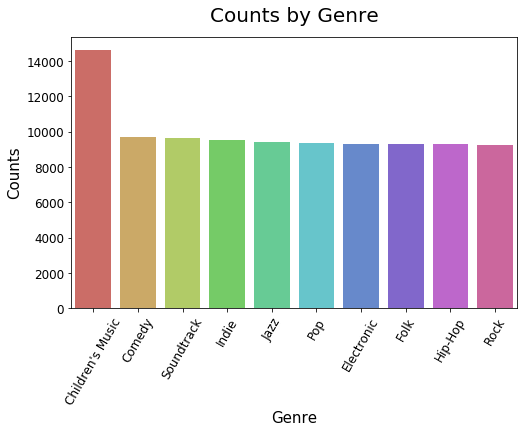

In [ ]:
# 출시된 장르의 수를 확인
count_top10_genre = df.genre.value_counts().to_frame().head(10).T

plt.figure(figsize=(8,5))
sns.barplot(data=count_top10_genre, palette="hls")
plt.title('Counts by Genre', fontsize=20, pad=15)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=12,  rotation=60)
plt.yticks(fontsize=12)
plt.show()

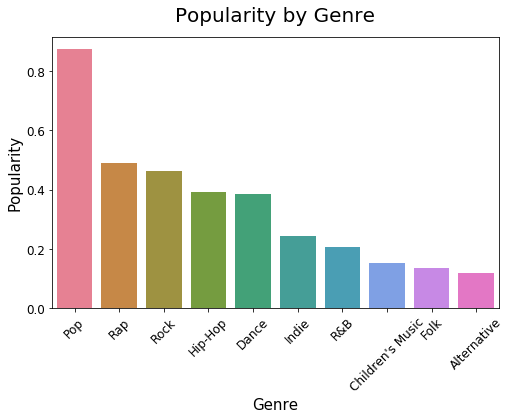

In [ ]:
# 인기도가 높은 Top 10 장르를 확인
top10_genre = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).to_frame().head(10).T

plt.figure(figsize=(8,5))
sns.barplot(data=top10_genre, palette="husl")
plt.title('Popularity by Genre', fontsize=20, pad=15)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

> - 가설 1. 가장 인기 있는 장르는 Pop일 것이다. == True
    - 또한, 출시되는 갯수가 많다고 인기를 차지하는 비중이 높지 않다는 것을 알 수 있다.



---

#### 문제 정의 2. 재생시간은 어느 정도가 적당할까요? 재생시간이 인기도에 영향을 줄까요?

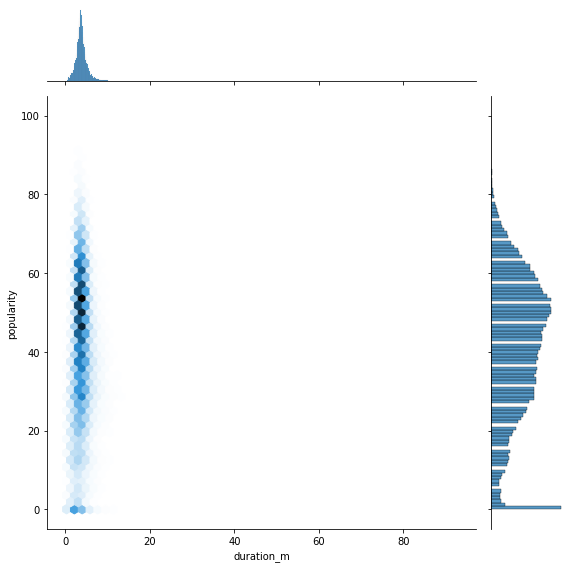

In [ ]:
# 분포 확인
hex_df = origin_df.copy()
hex_df['duration_ms'] = round(hex_df['duration_ms'] / 1000 / 60, 2)
hex_df.rename(columns={'duration_ms' : 'duration_m'}, inplace=True)

sns.jointplot(data=hex_df, x='duration_m', y='popularity', kind='hex', height=8)
plt.show()

> 확인 결과, 데이터가 몰려있음을 볼 수 있다.

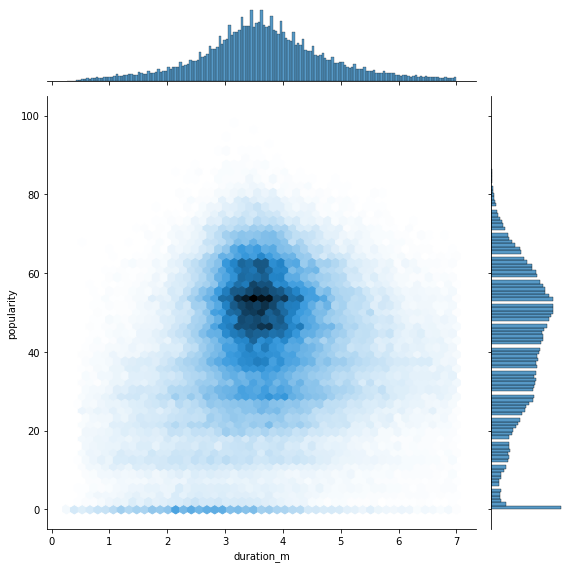

In [ ]:
# 재생시간이 7분을 초과하는 데이터를 삭제 후 확인
long_dur_df = hex_df.query("duration_m>7").index
droped_df = hex_df.drop(long_dur_df)

sns.jointplot(data=droped_df, x='duration_m', y='popularity', kind='hex', height=8)
plt.show()

> 3~4분 사이의 음원에서 인기도가 높음을 알 수 있다.

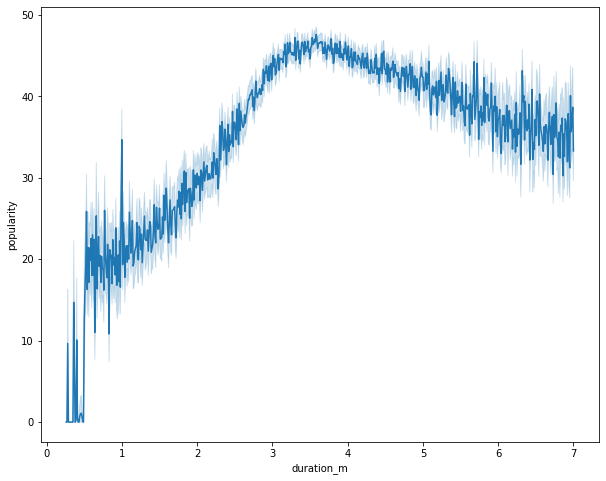

In [ ]:
# 더 확실히 보기위해 선 그래프로 확인
plt.figure(figsize=(10,8))
sns.lineplot(data=droped_df, x='duration_m', y='popularity')
plt.show()

> 확인 결과, 특정 구간의 재생시간이 넘어가면 재생시간이 길어질수록 인기도는 하락한다.

> 가설 2. 재생시간은 인기도에 영향을 주지 않을 것이다. == False

---

## 3. 모델링 및 모델 해석

### Install & Import

In [ ]:
# !pip install category_encoders==2.*
# !pip install xgboost --upgrade
# !pip install lightgbm 
# !pip3 install hyperopt
# !pip3 install eli5
# !pip3 install pdpbox

# import warnings

# warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

---

### train set EDA

중간 점검 때 체크했던 사항을 시행한다.  
1. 재생시간이 7분 초과의 트랙을 삭제한다.
2. 대중 음악과 동떨어지는 장르를 삭제한다.
 - 'Anime', 'Comedy', 'Opera', 'Movie', 'A Capella', 'Classical', "Children's Music"

In [ ]:
# train, validation, test으로 데이터를 분할
train, test = train_test_split(df, test_size=0.2, random_state=42)

# 각 데이터 세트의 shape 확인
print("train set : ",train.shape)
print("test set : ",test.shape)

train set :  (185763, 15)
test set :  (46441, 15)


In [ ]:
# 재생시간이 7분 초과인 트랙 삭제
long_dur = train.query("duration_m>7").index
train = train.drop(long_dur)
train.shape

(178427, 15)

In [ ]:
# 장르 삭제
delete = ['Anime', 'Comedy', 'Opera', 'Movie', 'A Capella', 'Classical', "Children's Music"]
train = train[~train.genre.isin(delete)]
train.shape

(135042, 15)

타겟데이터의 비율
 0    0.800588
1    0.199412
Name: popularity, dtype: float64


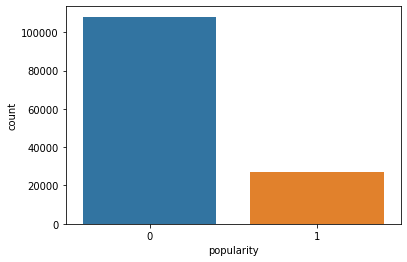

In [ ]:
# target 값 비율 확인
import seaborn as sns

print("타겟데이터의 비율\n",train[target].value_counts(normalize=True))

%matplotlib inline
sns.countplot(x=train[target]);

---

### 모델링

#### X, y 나누기 및 기준 모델 설정

In [ ]:
features = df.drop(target, axis=1).columns

# X와 y를 나누는 함수 만들기
def x_y_split(df) :
    X = df[features]
    y = df[target]
    return X, y

# 각 데이터 세트를 X와 y로 분할
X_train, y_train = x_y_split(train)
X_test, y_test = x_y_split(test)

In [ ]:
# 데이터가 잘 나눠졌는지 shape을 확인
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (135042, 14), y_train: (135042,)
X_test: (46441, 14), y_test: (46441,)


In [ ]:
def score(y, y_pred) :
    accuracy = accuracy_score(y, y_pred).round(3)
    precision = precision_score(y, y_pred).round(3)
    recall = recall_score(y, y_pred).round(3)
    f1 = f1_score(y, y_pred).round(3)
    return accuracy, precision, recall, f1

In [ ]:
def auc(y, y_pred_proba) :
    auc = roc_auc_score(y, y_pred_proba).round(3)

    return auc

In [ ]:
# 기준모델 설정
base = y_train.mode()[0]
baseline = len(y_train) * [base]

baseline_accuracy, baseline_precision, baseline_recall, baseline_f1 = score(y_train, baseline)
baseline_auc = auc(y_train, baseline)

In [ ]:
print("BaseLine Accuracy :", baseline_accuracy)
print("BaseLine Precision Score :", baseline_precision)
print("BaseLine Recall Score :", baseline_recall)
print("BaseLine F1 Score :", baseline_f1)
print("BaseLine AUC :", baseline_auc)

BaseLine Accuracy : 0.801
BaseLine Precision Score : 0.0
BaseLine Recall Score : 0.0
BaseLine F1 Score : 0.0
BaseLine AUC : 0.5


---

#### Logistic Regression
> 아래는 로지스틱회귀 모델을 위한 전처리

In [ ]:
# 수치형 데이터 스케일링
scaler = StandardScaler()
need_scale = X_train.dtypes[X_train.dtypes != 'object'].index

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for i in need_scale :
    X_train_scaled[i] = scaler.fit_transform(X_train[i].values.reshape(-1, 1))
    X_test_scaled[i] = scaler.transform(X_test[i].values.reshape(-1, 1))

X_train_scaled.head()

,genre,acousticness,danceability,duration_m,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
115817,Rap,-0.383739,-0.111908,1.568377,-1.297373,-0.440287,G#,-0.438568,-1.267374,Major,3.030656,-1.802842,4/4,0.112039
15293,Dance,-0.188639,0.520059,2.708544,1.044840,-0.440143,F,-0.812120,-0.544916,Major,-0.493648,-0.922471,4/4,1.771480
8959,Country,-0.830483,-0.203830,-0.023925,1.290708,-0.440287,A,-0.043405,0.619352,Major,-0.427308,-0.021419,4/4,0.309123
25858,Electronic,-0.931806,-0.473853,-0.259821,1.415799,-0.413417,F,0.709875,0.902552,Minor,1.123386,-1.472794,4/4,-1.038927
70955,Blues,-0.208480,0.393666,-0.692298,-0.387231,-0.439000,G,-0.506487,-0.637615,Major,-0.681265,-0.002920,4/4,0.029264


In [ ]:
# 문자형 데이터 인코딩
ohe = OneHotEncoder(use_cat_names=True)

X_train_encoded = ohe.fit_transform(X_train_scaled)
X_test_encoded = ohe.transform(X_test_scaled)

print(X_train_encoded.shape, X_test_encoded.shape)

(135042, 48) (46441, 48)


In [ ]:
# 로지스틱회귀 모델
logistic = LogisticRegressionCV(class_weight='balanced')
logistic.fit(X_train_encoded, y_train)
y_log_pred = logistic.predict(X_test_encoded)
y_log_pred_proba = logistic.predict_proba(X_test_encoded)[:,1]

log_test_accuracy, log_test_precision, log_test_recall, log_test_f1 = score(y_test, y_log_pred)
log_test_auc = auc(y_test, y_log_pred_proba)

In [ ]:
print("Logistic Test Accuracy :", log_test_accuracy)
print("Logistic Test Precision Score :", log_test_precision)
print("Logistic Test Recall Score :", log_test_recall)
print("Logistic Test F1 Score :", log_test_f1)
print("Logistic Test AUC :", log_test_auc)

Logistic Test Accuracy : 0.822
Logistic Test Precision Score : 0.463
Logistic Test Recall Score : 0.744
Logistic Test F1 Score : 0.571
Logistic Test AUC : 0.863


---

#### Random Forest Classifier

In [ ]:
# 하이퍼파라미터 서치에 사용할 값 범위 설정
params = {
    "randomforestclassifier__n_estimators": hp.quniform("n_estimators", 100, 2500, 100),
    # "randomforestclassifier__min_samples_split": hp.choice("min_samples_split", [2, 3, 5, 7, 9]),
    "randomforestclassifier__max_depth": hp.choice("max_depth", [1, 2, 3, 4, 5, 10 ,20, 30]),
    # "randomforestclassifier__max_leaf_nodes": hp.quniform("max_leaf_nodes", 1, 5, 1),
    # "randomforestclassifier__oob_score": hp.choice("oob_score", [True, False]),
    # "randomforestclassifier__max_features": hp.choice("max_features", ['auto', 'squrt', 'log2']),
    # "randomforestclassifier__criterion": hp.choice("criterion", ['gini', 'entropy']),
}

In [ ]:
# 베이지안 서치 시행
def get_pipe(params):
    params["randomforestclassifier__max_depth"] = int(
        params["randomforestclassifier__max_depth"]
    )  
    params["randomforestclassifier__n_estimators"] = int(
        params["randomforestclassifier__n_estimators"]
    )  
    pipe = make_pipeline(
        OrdinalEncoder(),
        RandomForestClassifier(
            class_weight='balanced',
            random_state=42,
            n_jobs=-1,
        ),
    )
    pipe = pipe.set_params(**params)
    return pipe


def fit_and_eval(params):
    pipe = get_pipe(params)
    score = cross_val_score(pipe, X_train, y_train, cv=3, scoring="roc_auc")
    avg_cv_score = np.mean(score)
    return {"loss": -avg_cv_score, "status": STATUS_OK}


rf_trials = (
    Trials()
)

best_params = fmin(
    fn=fit_and_eval, trials=rf_trials, space=params, algo=tpe.suggest, max_evals=30
)

100%|████████████████████████████████████████████████| 30/30 [32:10<00:00, 64.34s/trial, best loss: -0.893371612978803]


In [ ]:
print("Random Forest 최적의 하이퍼파라미터 :", rf_trials.best_trial["misc"]["vals"])
print("Random Forest 최적의 AUC :", -rf_trials.best_trial["result"]["loss"])

Random Forest 최적의 하이퍼파라미터 : {'max_depth': [7], 'n_estimators': [1600.0]}
Random Forest 최적의 AUC : 0.893371612978803


In [ ]:
# 랜덤포레스트분류 모델
rf_pipe = make_pipeline(
            OrdinalEncoder(),
            RandomForestClassifier(
                class_weight='balanced',
                random_state=42,
                n_jobs=-1,
                n_estimators=1600,
                max_depth=7,
        ),
)

rf_pipe.fit(X_train, y_train)
    
y_rf_pred = rf_pipe.predict(X_test)
y_rf_pred_proba = rf_pipe.predict_proba(X_test)[:,1]

rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_f1 = score(y_test, y_rf_pred)
rf_test_auc = auc(y_test, y_rf_pred_proba)

In [ ]:
print("Random Forest Test Accuracy :", rf_test_accuracy)
print("Random Forest Test Precision Score :", rf_test_precision)
print("Random Forest Test Recall Score :", rf_test_recall)
print("Random Forest Test F1 Score :", rf_test_f1)
print("Random Forest Test AUC :", rf_test_auc)

Random Forest Test Accuracy : 0.733
Random Forest Test Precision Score : 0.344
Random Forest Test Recall Score : 0.755
Random Forest Test F1 Score : 0.473
Random Forest Test AUC : 0.827


---

#### XGB Classifier

In [ ]:
# 하이퍼파라미터 서치에 사용할 값 범위 설정
params = {
    "xgbclassifier__n_estimators": hp.quniform("n_estimators", 100, 2500, 100),
    "xgbclassifier__learning_rate": hp.quniform("learning_rate", 0.01, 0.06, 0.01),
    "xgbclassifier__colsample_bytree": hp.quniform("colsample_bytree", 0.5, 1.0, 0.1),
    "xgbclassifier__min_child_weight": hp.quniform("min_child_weight", 1, 21, 1),
    "xgbclassifier__max_depth": hp.choice("max_depth", [1, 2, 3, 4, 5, 10 ,20, 30]),
    "xgbclassifier__reg_lambda": hp.choice("reg_lambda", [0, 1, 10, 20, 100, 150, 200]),
    "xgbclassifier__reg_alpha": hp.quniform("reg_alpha", 0, 0.2, 0.1),
    "xgbclassifier__scale_pos_weight": hp.uniform("scale_pos_weight", 2.5, 3.5),
         }

In [ ]:
# 베이지안 서치 시행
def get_pipe(params):
    params["xgbclassifier__max_depth"] = int(
        params["xgbclassifier__max_depth"]
    )  
    params["xgbclassifier__n_estimators"] = int(
        params["xgbclassifier__n_estimators"]
    )  
    pipe = make_pipeline(
        OrdinalEncoder(),
        XGBClassifier(
            objective="binary:logistic",
            eval_metric="error",
            random_state=42,
            n_jobs=-1,
        ),
    )
    pipe = pipe.set_params(**params)
    return pipe


def fit_and_eval(params):
    pipe = get_pipe(params)
    score = cross_val_score(pipe, X_train, y_train, cv=3, scoring="roc_auc")
    avg_cv_score = np.mean(score)
    return {"loss": -avg_cv_score, "status": STATUS_OK}


xgb_trials = (
    Trials()
)

best_params = fmin(
    fn=fit_and_eval, trials=xgb_trials, space=params, algo=tpe.suggest, max_evals=30
)

100%|████████████████████████████████████████████| 30/30 [1:36:15<00:00, 192.52s/trial, best loss: -0.9116167417540769]


In [ ]:
print("XGB 최적의 하이퍼파라미터 :", xgb_trials.best_trial["misc"]["vals"])
print("XGB 최적의 AUC :", -xgb_trials.best_trial["result"]["loss"])

XGB 최적의 하이퍼파라미터 : {'colsample_bytree': [0.7000000000000001], 'learning_rate': [0.04], 'max_depth': [7], 'min_child_weight': [11.0], 'n_estimators': [2500.0], 'reg_alpha': [0.0], 'reg_lambda': [6], 'scale_pos_weight': [2.704585271920224]}
XGB 최적의 AUC : 0.9116167417540769


In [ ]:
# XGB분류 모델
xgb_pipe = make_pipeline(
            OrdinalEncoder(),
            XGBClassifier(
                objective="binary:logistic",
                eval_metric="error",
                random_state=42,
                n_jobs=-1,
                colsample_bytree=0.7000000000000001,
                learning_rate=0.04,
                max_depth=7,
                min_child_weight=11,
                n_estimators=2500,
                reg_alpha=0,
                reg_lambda=6,
                scale_pos_weight=2.704585271920224,
            ))

xgb_pipe.fit(X_train, y_train)
    
y_xgb_pred = xgb_pipe.predict(X_test)
y_xgb_pred_proba = xgb_pipe.predict_proba(X_test)[:,1]

xgb_test_accuracy, xgb_test_precision, xgb_test_recall, xgb_test_f1 = score(y_test, y_xgb_pred)
xgb_test_auc = auc(y_test, y_xgb_pred_proba)

In [ ]:
print("XGB Test Accuracy :", xgb_test_accuracy)
print("XGB Test Precision Score :", xgb_test_precision)
print("XGB Test Recall Score :", xgb_test_recall)
print("XGB Test F1 Score :", xgb_test_f1)
print("XGB Test AUC :", xgb_test_auc)

XGB Test Accuracy : 0.783
XGB Test Precision Score : 0.403
XGB Test Recall Score : 0.767
XGB Test F1 Score : 0.528
XGB Test AUC : 0.865


---

#### LGBM Classifier

In [ ]:
# 하이퍼파라미터 서치에 사용할 값 범위 설정
params = {
    "lgbmclassifier__n_estimators": hp.quniform("n_estimators", 100, 2500, 100),
    "lgbmclassifier__learning_rate": hp.quniform("learning_rate", 0.01, 0.06, 0.01),
    "lgbmclassifier__subsample": hp.quniform("subsample", 0.3, 1.0, 0.1),
    "lgbmclassifier__colsample_bytree": hp.quniform("colsample_bytree", 0.5, 1.0, 0.1),
    "lgbmclassifier__scale_pos_weight": hp.uniform("scale_pos_weight", 2.5, 3.5),
         }

In [ ]:
# 베이지안 서치 시행
def get_pipe(params):
    params["lgbmclassifier__n_estimators"] = int(
        params["lgbmclassifier__n_estimators"]
    ) 
    pipe = make_pipeline(
        OrdinalEncoder(),
        LGBMClassifier(
            max_depth=-1,
            objective='binary', 
            boosting_type='dart',
            random_state=42, 
            n_jobs=-1)
            )
    pipe = pipe.set_params(**params)
    return pipe


def fit_and_eval(params):
    pipe = get_pipe(params)
    score = cross_val_score(pipe, X_train, y_train, cv=3, scoring="roc_auc")
    avg_cv_score = np.mean(score)
    return {"loss": -avg_cv_score, "status": STATUS_OK}


lgbm_trials = (
    Trials()
)

best_params = fmin(
    fn=fit_and_eval, trials=lgbm_trials, space=params, algo=tpe.suggest, max_evals=30
)

100%|███████████████████████████████████████████████| 30/30 [40:52<00:00, 81.74s/trial, best loss: -0.8835739538897883]


In [ ]:
print("LGBM 최적의 하이퍼파라미터 :", lgbm_trials.best_trial["misc"]["vals"])
print("LGBM 최적의 AUC :", -lgbm_trials.best_trial["result"]["loss"])

LGBM 최적의 하이퍼파라미터 : {'colsample_bytree': [0.9], 'learning_rate': [0.06], 'n_estimators': [2500.0], 'scale_pos_weight': [3.186529635416566], 'subsample': [0.7000000000000001]}
LGBM 최적의 AUC : 0.8835739538897883


In [ ]:
# LGBM분류 모델
lgbm_pipe = make_pipeline(
            OrdinalEncoder(),
            LGBMClassifier(
                max_depth=-1,
                objective='binary', 
                boosting_type='dart',
                random_state=42, 
                n_jobs=-1,
                n_estimators=2500,
                learning_rate=0.05,
                subsample=0.7000000000000001,
                colsample_bytree=0.9,
                scale_pos_weight=3.186529635416566,
           ))

lgbm_pipe.fit(X_train, y_train)
    
y_lgbm_pred = lgbm_pipe.predict(X_test)
y_lgbm_pred_proba = lgbm_pipe.predict_proba(X_test)[:,1]

lgbm_test_accuracy, lgbm_test_precision, lgbm_test_recall, lgbm_test_f1 = score(y_test, y_lgbm_pred)
lgbm_test_auc = auc(y_test, y_lgbm_pred_proba)

In [ ]:
print("LGBM Test Accuracy :", lgbm_test_accuracy)
print("LGBM Test Precision Score :", lgbm_test_precision)
print("LGBM Test Recall Score :", lgbm_test_recall)
print("LGBM Test F1 Score :", lgbm_test_f1)
print("LGBM Test AUC :", lgbm_test_auc)

LGBM Test Accuracy : 0.666
LGBM Test Precision Score : 0.293
LGBM Test Recall Score : 0.782
LGBM Test F1 Score : 0.426
LGBM Test AUC : 0.81


---

#### 모델별 성능 비교

In [ ]:
comparison_metrics = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'], columns=['BaseLine', 'Logistic','RandomForest', 'XGB', 'LGBM'])
comparison_metrics['BaseLine'] = [baseline_accuracy, baseline_precision, baseline_recall, baseline_f1, baseline_auc]
comparison_metrics['Logistic'] = [log_test_accuracy, log_test_precision, log_test_recall, log_test_f1, log_test_auc]
comparison_metrics['RandomForest'] = [rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_f1, rf_test_auc]
comparison_metrics['XGB'] = [xgb_test_accuracy, xgb_test_precision, xgb_test_recall, xgb_test_f1, xgb_test_auc]
comparison_metrics['LGBM'] = [lgbm_test_accuracy, lgbm_test_precision, lgbm_test_recall, lgbm_test_f1, lgbm_test_auc]
comparison_metrics

,BaseLine,Logistic,RandomForest,XGB,LGBM
Accuracy,0.801,0.822,0.733,0.783,0.666
Precision,0.000,0.463,0.344,0.403,0.293
Recall,0.000,0.744,0.755,0.767,0.782
F1,0.000,0.571,0.473,0.528,0.426
AUC,0.500,0.863,0.827,0.865,0.810


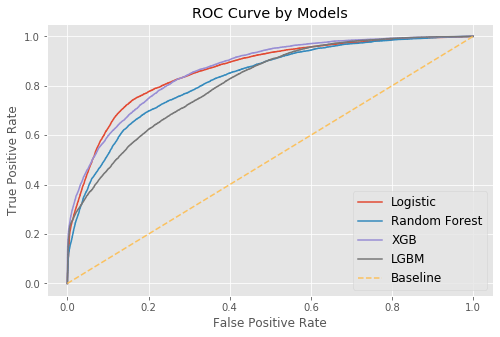

In [ ]:
log_fpr, log_tpr, log_ = roc_curve(y_test, y_log_pred_proba)
rf_fpr, rf_tpr, rf_ = roc_curve(y_test, y_rf_pred_proba)
xgb_fpr, xgb_tpr, xgb_ = roc_curve(y_test, y_xgb_pred_proba)
lgbm_fpr, lgbm_tpr, lgbm_ = roc_curve(y_test, y_lgbm_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))

plt.style.use("ggplot")
plt.figure(figsize=(8,5))
plt.plot(log_fpr, log_tpr, label="Logistic")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot(xgb_fpr, xgb_tpr, label="XGB")
plt.plot(lgbm_fpr, lgbm_tpr, label="LGBM")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("ROC Curve by Models")
plt.legend(prop={"size": 12})
plt.show()

---

### 모델 해석

#### 문제 정의 3. 인기도에 가장 영향을 많이 주는 요소는 무엇일까요?

##### Permutation Importance - Logistic

In [ ]:
# permuter 정의
permuter = PermutationImportance(
    logistic, # .named_steps["logisticregressioncv"],  # model
    scoring="roc_auc",  # metric
    n_iter=30,  # 다른 random seed를 사용하여 30번 반복
    random_state=42,
)

# 스코어 다시 계산
permuter.fit(X_test_encoded, y_test)

PermutationImportance(estimator=LogisticRegressionCV(class_weight='balanced'),
                      n_iter=30, random_state=42, scoring='roc_auc')

Text(0.5, 1.0, 'Permutation Importance')

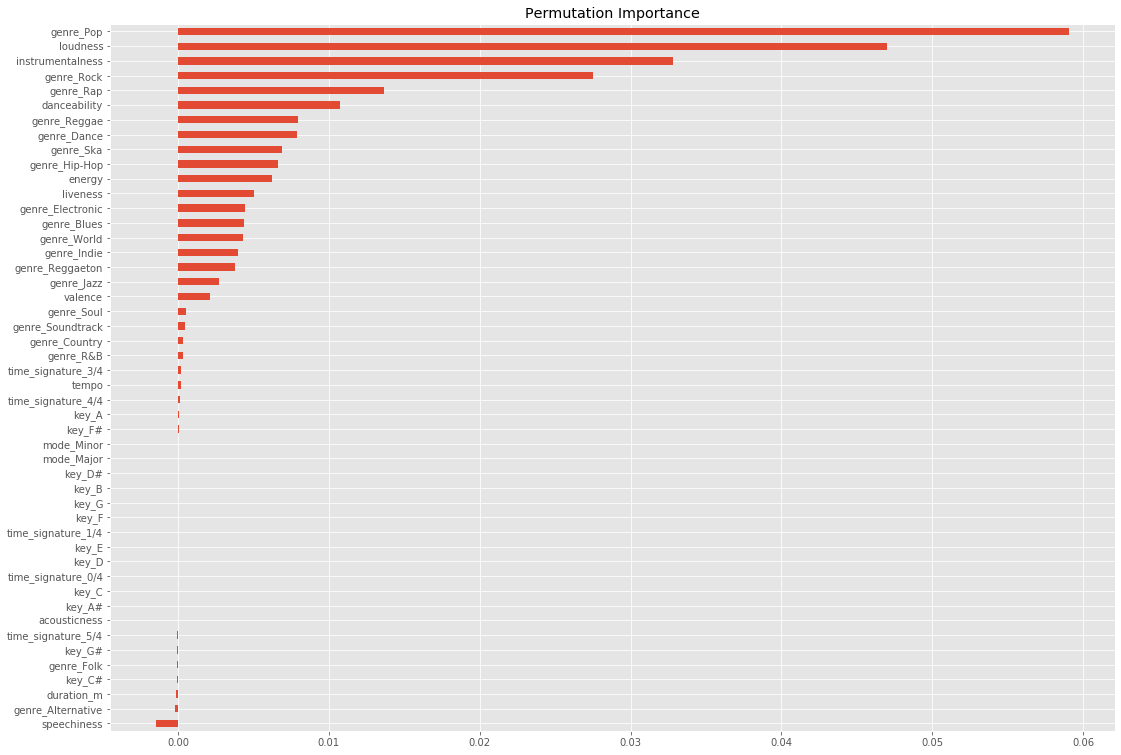

In [ ]:
feature_names = X_test_encoded.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
plt.figure(figsize=(18,13))
pi.plot.barh()
plt.title("Permutation Importance")

In [ ]:
# 특성별 score을 확인
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names,
)

Weight,Feature
0.0591 ± 0.0015,genre_Pop
0.0470 ± 0.0024,loudness
0.0328 ± 0.0028,instrumentalness
0.0275 ± 0.0011,genre_Rock
0.0136 ± 0.0009,genre_Rap
0.0107 ± 0.0015,danceability
0.0080 ± 0.0010,genre_Reggae
0.0079 ± 0.0004,genre_Dance
0.0069 ± 0.0010,genre_Ska
0.0066 ± 0.0004,genre_Hip-Hop


---

#### Permutation Importance - XGB

In [ ]:
# permuter 정의
xgb_permuter = PermutationImportance(
    xgb_pipe.named_steps["xgbclassifier"],  # model
    scoring="roc_auc",  # metric
    n_iter=30,  # 다른 random seed를 사용하여 10번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
xgb_X_test_preprocessed = xgb_pipe[0].transform(X_test)
xgb_permuter.fit(xgb_X_test_preprocessed, y_test)

PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.7000000000000001,
                                              enable_categorical=False,
                                              eval_metric='error', gamma=0,
                                              gpu_id=-1, importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.04,
                                              max_delta_step=0, max_depth=7,
                                              min_child_weight=11, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=2500, n_jobs=-1,
                               

Text(0.5, 1.0, 'Permutation Importance')

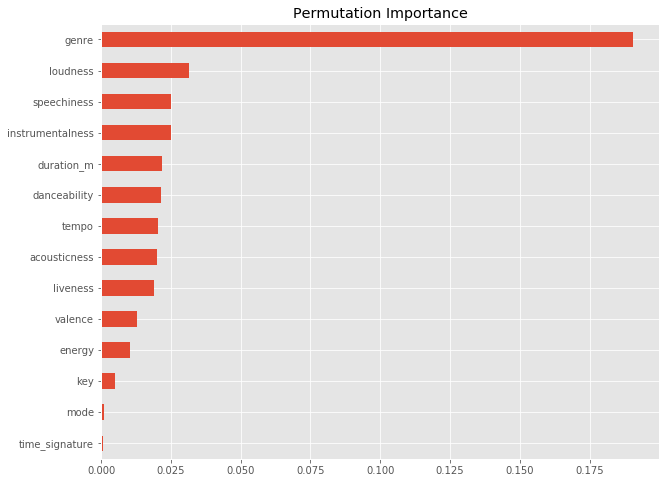

In [ ]:
xgb_feature_names = X_test.columns.tolist()
xgb_pi = pd.Series(xgb_permuter.feature_importances_, xgb_feature_names).sort_values()

plt.figure(figsize=(10,8))
xgb_pi.plot.barh()
plt.title("Permutation Importance")

In [ ]:
eli5.show_weights(
    xgb_permuter,
    top=None,
    feature_names=xgb_feature_names,
)

Weight,Feature
0.1903 ± 0.0053,genre
0.0317 ± 0.0021,loudness
0.0251 ± 0.0016,speechiness
0.0250 ± 0.0015,instrumentalness
0.0219 ± 0.0010,duration_m
0.0216 ± 0.0012,danceability
0.0204 ± 0.0012,tempo
0.0201 ± 0.0017,acousticness
0.0190 ± 0.0010,liveness
0.0129 ± 0.0012,valence


> - 가설 3. 인기도에 가장 영향을 많이 주는 특성은 energy일 것이다. == False  
    - 영향을 가장 많이 주는 특성은 Genre다.

---

#### PDP Plot

In [ ]:
target_feature_1 = ""

isolated_1 = pdp_isolate(
    model=,
    dataset=X_test,
    model_features=X_test.columns,
    feature=target_feature_1,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)

pdp_plot(
    isolated_1,
    feature_name="",
    plot_lines=True,
    frac_to_plot=50,
    plot_pts_dist=True,
)

---

#### 문제 정의 4. Genre에 따라 Danceability가 예측에 영향을 주는 정도가 다를까요?

##### 2변수 PDP Plot

In [ ]:
target_features = ["", ""]

interaction = pdp_interact(
    model=,
    dataset=X_test,
    model_features=X_test.columns,
    features=["", ""],
)

> 가설 4. Genre에 따라 Danceability가 예측에 영향을 주는 정도가 다를 것이다.  